In [186]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [11]:
PATH_DATASET_train = "../data/human_recognition/train"

In [12]:
X_train = np.loadtxt(os.path.join(PATH_DATASET_train, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET_train, "y_train.txt")).astype(int)

In [13]:
PATH_DATASET_test = "../data/human_recognition/test"
X_test = np.loadtxt(os.path.join(PATH_DATASET_test, "X_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_DATASET_test, "y_test.txt")).astype(int)

In [14]:
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [15]:
df = pd.DataFrame(data=X_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


### PCA

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [20]:
pca = PCA(n_components=0.9, random_state=1).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [21]:
X_pca.shape[1]

63

### Clasificación

In [22]:
clases = np.unique(y_train)
clases

array([1, 2, 3, 4, 5, 6])

In [24]:
act_mask = y_train <= 3
st_mask = y_train > 3

In [25]:
y_class_train = y_train.copy()

y_class_train[act_mask] = 0
y_class_train[st_mask] = 1

In [26]:
x_class_train = X_pca[:, :2]

In [28]:
print(y_class_train.shape)
print(x_class_train.shape)

(7352,)
(7352, 2)


In [109]:
lr = SGDClassifier(loss = 'log', l1_ratio=0.01, verbose=1, max_iter=10000)
lr.fit(x_class_train, y_class_train)

-- Epoch 1
Norm: 47.59, NNZs: 2, Bias: -6.294970, T: 7352, Avg. loss: 0.975986
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 16.97, NNZs: 2, Bias: -7.459157, T: 14704, Avg. loss: 0.336741
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 11.35, NNZs: 2, Bias: -9.764299, T: 22056, Avg. loss: 0.257841
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 8.71, NNZs: 2, Bias: -10.958102, T: 29408, Avg. loss: 0.154477
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.72, NNZs: 2, Bias: -11.230752, T: 36760, Avg. loss: 0.138500
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.10, NNZs: 2, Bias: -12.200400, T: 44112, Avg. loss: 0.105359
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 7.61, NNZs: 2, Bias: -12.192055, T: 51464, Avg. loss: 0.072880
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 4.78, NNZs: 2, Bias: -12.505350, T: 58816, Avg. loss: 0.066650
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.69, NNZs: 2, Bias: -12.383813, T: 66168, Avg. loss: 0.048697
T

SGDClassifier(l1_ratio=0.01, loss='log', max_iter=10000, verbose=1)

In [207]:
intercept = -(lr.intercept_/lr.coef_[0][1])
print(intercept)

[-12.84603032]


In [208]:
slope = -(lr.coef_[0][0]/ lr.coef_[0][1])
print(slope)

-3.3389169427319385


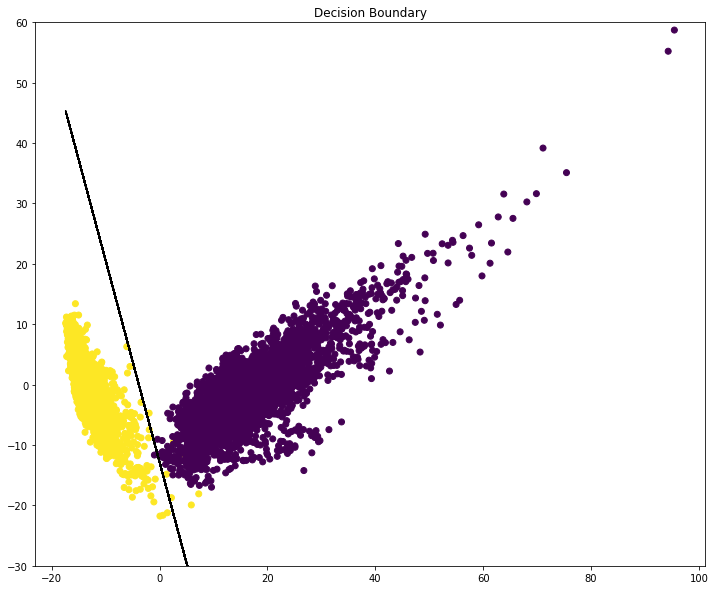

In [210]:
plt.figure(figsize=(12,10))
plt.scatter(x_class_train[:, 0], x_class_train[:, 1], c=y_class_train[:])
y_vals = intercept + (slope * x_class_train[:, 0])
plt.plot(x_class_train[:, 0], y_vals, c="k")
plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

In [211]:
x,y = np.meshgrid(np.arange(-20,100,0.1),np.arange(-30,60,0.1))

In [212]:
xx, yy = x.flatten(), y.flatten()

xx, yy = xx.reshape((len(xx), 1)), yy.reshape((len(yy), 1))

grid = np.hstack((xx,yy))

In [213]:
grid

array([[-20. , -30. ],
       [-19.9, -30. ],
       [-19.8, -30. ],
       ...,
       [ 99.7,  59.9],
       [ 99.8,  59.9],
       [ 99.9,  59.9]])

In [214]:
yhat = lr.predict(grid) 
zz = yhat.reshape(x.shape)

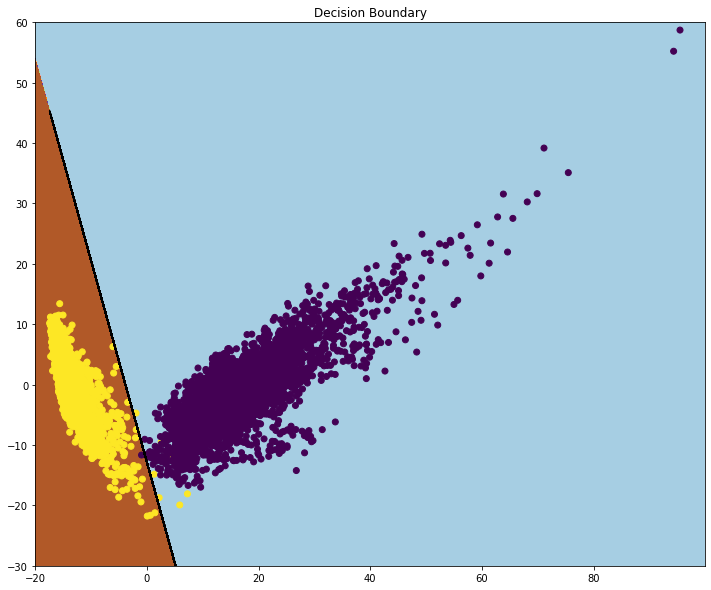

In [215]:
plt.figure(figsize=(12,10))
plt.contourf(x, y, zz, cmap='Paired')


plt.scatter(x_class_train[:, 0], x_class_train[:, 1], c=y_class_train[:])
y_vals = intercept + (slope * x_class_train[:, 0])
plt.plot(x_class_train[:, 0], y_vals, c="k")


plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

### Predicciones sobre el dataset test

In [216]:
X_test.shape

(2947, 561)

In [217]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
x_class_test = X_test_pca[:, :2]

In [218]:
x_class_test.shape

(2947, 2)

In [219]:
act_mask = y_test <= 3
st_mask = y_test > 3

In [220]:
y_class_test = y_test.copy()

y_class_test[act_mask] = 0
y_class_test[st_mask] = 1

In [221]:
y_class_test.shape

(2947,)

In [222]:
predictions = lr.predict(x_class_test)

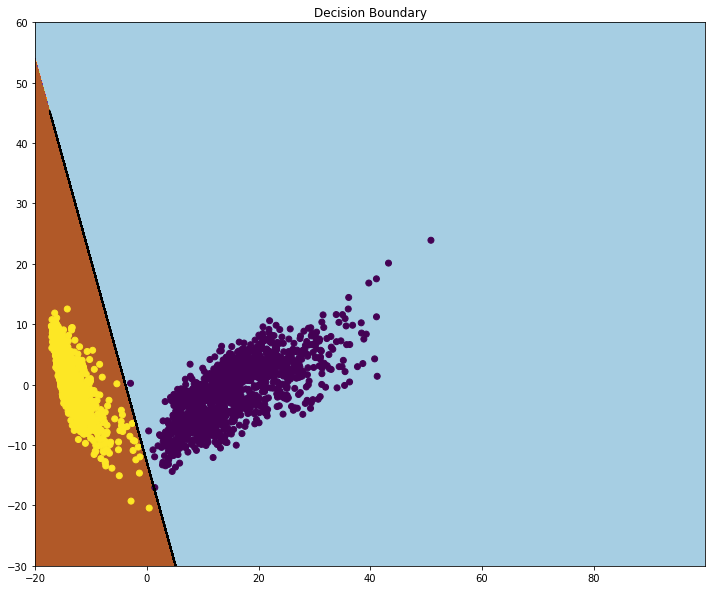

In [223]:
plt.figure(figsize = (12,10))
plt.contourf(x, y, zz, cmap='Paired')


plt.scatter(x_class_test[:, 0], x_class_test[:, 1], c=predictions)

y_vals = intercept + (slope * x_class_train[:, 0])

plt.plot(x_class_train[:, 0], y_vals, c="k")


plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

### Métricas

In [224]:
accuracy = accuracy_score(y_class_test, predictions)
accuracy

0.9989820156090939

In [225]:
precision = precision_score(y_class_test, predictions)
precision

1.0

In [226]:
recall = recall_score(y_class_test, predictions)
recall

0.9980769230769231

In [227]:
predictions = predictions.reshape(2947,1)
predictions

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

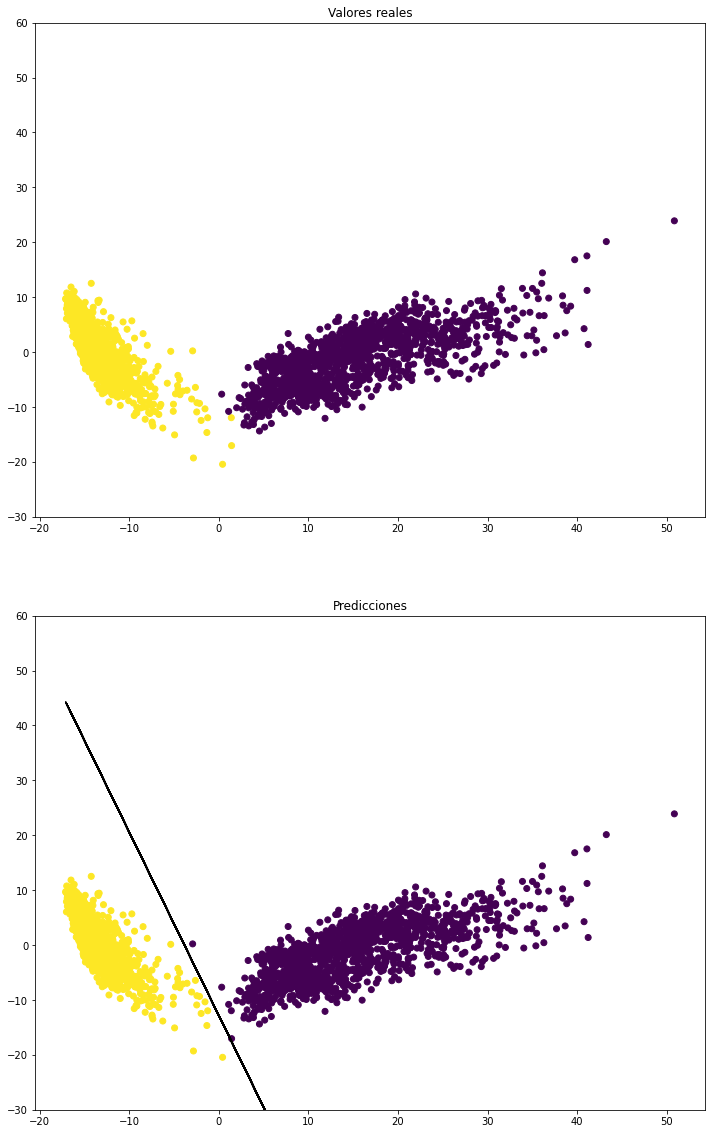

In [232]:
f, (ax, bx) = plt.subplots(2, 1, sharey='col', figsize=(12, 20))

ax.scatter(x_class_test[:, 0], x_class_test[:, 1], c=y_class_test)
ax.set_title('Valores reales')
ax.set_ylim((-30, 60))

bx.scatter(x_class_test[:, 0], x_class_test[:, 1], c=predictions[:, 0])
y_vals = intercept + (slope * x_class_test[:, 0])
bx.plot(x_class_test[:, 0], y_vals, c="k")
bx.set_title('Predicciones')
bx.set_ylim((-30, 60))

plt.show()